# Baseline Models: Time Series Forecasting

## Overview

<style>
    table.custom-table {
        max-width: 1000px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 500px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>


<table class="custom-table">
    <thead>
        <tr>
            <th>Output: Baseline Models for Forecasting</th>
            <th>Input: Original Time Series</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="src/01_output.png">
            </td>
            <td>
                <img src="src/01_input.png">
            </td>
        </tr>
    </tbody>
</table>

## Data

In [ ]:
#!

import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

df_passengers = pd.read_csv('../data/airline-passengers.csv', parse_dates=["Month"], index_col="Month")
df_passengers = df_passengers.asfreq('MS')
df_passengers

,Passengers
Month,
1949-01-01,112
1949-02-01,118
...,...
1960-11-01,390
1960-12-01,432


## Create DataFrame for storing forecasts

Timestamp('1960-12-01 00:00:00', freq='MS')

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
               '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
               '1963-01-01', '1963-02-01', '1963-03-01', '1963-04-01',
               '1963-05-01', '1963-06-01', '1963-07-01', '1963-08-01',
               '1963-09-01', '1963-10-01', '1963-11-01', '1963-12-01',
               '1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01', '1964-11-01', '1964-12-01'],
              dtype='datetime64[ns]', freq='MS')

,Passengers
1961-01-01,NaN
1961-02-01,NaN
...,...
1964-11-01,NaN
1964-12-01,NaN


## Prepare Historical Data

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

## Last Observation Method

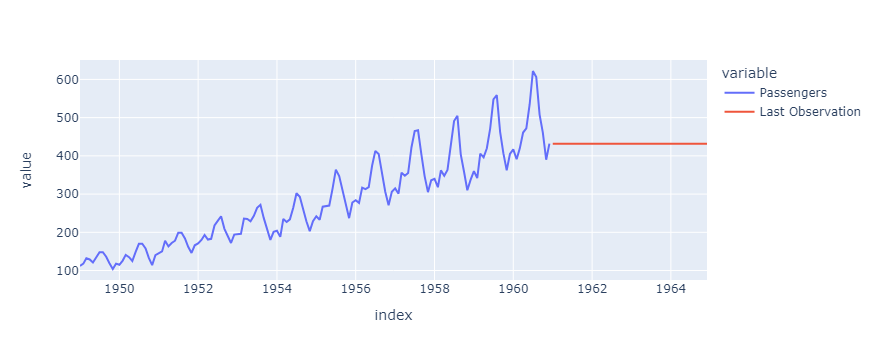

In [ ]:
def last_observation_forecast(data, horizon): #!
    last_obs = data[-1]
    return [last_obs] * horizon

df_forecast['Last Observation'] = last_observation_forecast(data, horizon)

pd.concat([df_passengers, df_forecast]).plot()

## Seasonal Naive Method

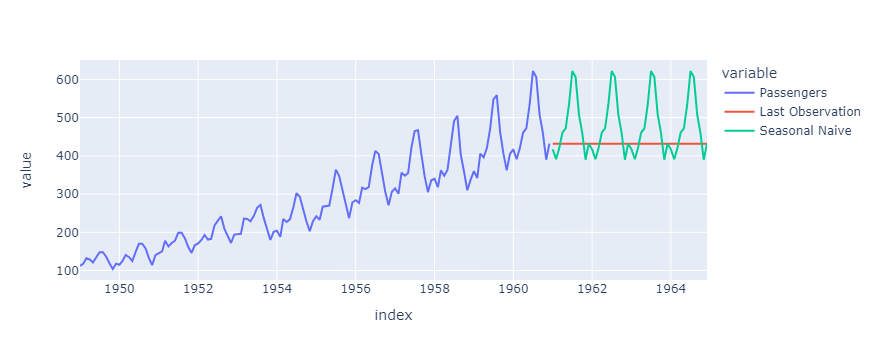

In [ ]:
def seasonal_naive_forecast(data, horizon, seasonality): #!
    seasonal_forecasts = []
    for i in range(horizon):
        seasonal_forecasts.append(data[-seasonality + (i % seasonality)])
    return seasonal_forecasts

df_forecast['Seasonal Naive'] = seasonal_naive_forecast(data, horizon, seasonality=12)

pd.concat([df_passengers, df_forecast]).plot()

## Moving Average Method

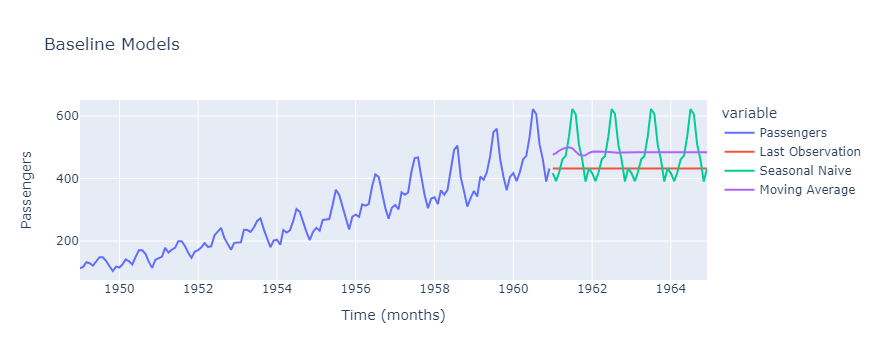

In [ ]:
def moving_average_forecast(data, window_size, horizon): #!
    for i in range(horizon):
        forecast = data[-window_size:].mean()
        data = np.concatenate([data, [forecast]])
    return data[-horizon:]

df_forecast['Moving Average'] = moving_average_forecast(data, window_size=12, horizon=horizon)

fig = pd.concat([df_passengers, df_forecast]).plot(title='Baseline Models')
fig = fig.update_layout(xaxis_title='Time (months)', yaxis_title='Passengers')
fig

,Passengers
Month,
1949-01-01,112
1949-02-01,118
...,...
1960-11-01,390
1960-12-01,432


,Passengers,Last Observation,Seasonal Naive,Moving Average
1961-01-01,NaN,432,417,476.166667
1961-02-01,NaN,432,391,481.097222
...,...,...,...,...
1964-11-01,NaN,432,390,483.712156
1964-12-01,NaN,432,432,483.707130
